# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3100 - Ciencia de Datos Geoespaciales
**Pontificia Universidad Católica de Chile**<br>
**Magister en Ciencia de Datos**<br>

<h2><center>Tarea 3:  Análisis Espacial de Islas de Calor Urbanas </center></h2>



<div class="alert alert-block alert-info">

## Instrucciones generales.

&#128467; **Fecha de entrega:** 23 de enero de 2026, 23:59. <br>

&#128236; **Entrega:** a través de la plataforma Coursera, adjunte todos los archivos necesarios para ejecutar su código dentro de una única carpeta comprimida (.zip). Incluya el  Jupyter Notebook con el desarrollo (puede utilizar este mismo notebook), y las capas o archivos vectoriales que haya generado como parte de su análisis. El objetivo es que **el Notebook pueda correr completamente dentro de la carpeta entregada**. <br>

&#128013; La Tarea debe ser desarrollada en lenguaje de programación Python. <br>

&#11088; En el Notebook, incluya texto explicando los pasos u operaciones desarrolladas, no sólo el código. El objetivo es que el Notebook siga un hilo narrativo, sea claro y atractivo de leer. En [este link](https://github.com/brad-do/nb-miscellany/blob/master/things_to_do_in_markdown.ipynb) puede encontrar algunos tips útiles para usar celdas de anotaciones o Markdown. <br>

&#128519; El trabajo es **invididual**, y debe seguir todos los lineamientos de integridad académica del curso. Recuerde referenciar apropiadamente todas las referencias, códigos y datos consultados para el desarrollo de su tarea.<br>

</div>

## Introducción 

Alrededor del mundo, las ciudades están experimentando aumentos sostenidos de temperatura debido a los efectos combinados de cambio climático y urbanización, llegando a generarse zonas de extremo sobrecalentamiento o *islas urbanas de calor*, que prepresentan un riesgo significativo para la actividad y salud humana. 

Uno de los elementos claves en el estudio de las islas urbanas de calor y de la adaptación al sobrecalentamiento urbano, es el análisis de la distribución espacio-temporal de la temperatura superficial (Land Surface Temperature, LST) y de los factores que la determinan. La LST es ampliamente utilizada también en el estudio de fenómenos como la evotranspiración, cambio climático, ciclos hidrológicos, y cambios en la vegetación, entre otros (Eshetie 2024, Li et al. 2013).

En esta tarea, **ud. analizará los patrones de temperatura e islas de calor** en la ciudad de Santiago de Chile.

**Referencias:**
 
- Seyoum M. Eshetie. Exploring urban land surface temperature using spatial modelling techniques: a case study of Addis Ababa city, Ethiopia. *Sci Rep* 14, 6323 (2024). https://doi.org/10.1038/s41598-024-55121-6

- Zhao-Liang Li, Bo-Hui Tang, Hua Wu, Huazhong Ren, Guangjian Yan, Zhengming Wan, Isabel F. Trigo, José A. Sobrino.
Satellite-derived land surface temperature: Current status and perspectives, *Remote Sensing of Environment*, 131, 14 (2013). https://doi.org/10.1016/j.rse.2012.12.008.
    

## Desarrollo



### 1. Generación de mapas de temperaturas. [6 ptos]

Para analizar las distribuciones de temperatura en la ciudad de Santiago, consideraremos como fuente de datos, los rasters de temperatura superficial (LST) generados a partir de imágenes satelitales térmicas, en particular de la colección [Landsat 8](https://developers.google.com/earth-engine/datasets/catalog/landsat-8)

Para ello, desarrolle los siguientes puntos:


#### 1.1 [1pto]  Defina una región y fechas de interés para el estudio, de manera de abarcar la zona urbana metropolitana, y la temporada de verano 2024. 

#### 1.2 [1 ptos] Seleccione las imágenes a utilizar, y aplique todas las correcciones y escalamientos apropiados para la colección.

#### 1.3 [4 ptos] Utilice la banda `ST_B10`de Landsat 8 para generar un mapa de temperatura superficial para Santiago *en grados Celsius*.




### 2. Análisis de patrones de temperatura. [12 ptos]


#### 2.1 [6 ptos] Analice el patrón de temperatura superficial  para el verano 2024.

**a)** [3 ptos] ¿Hay evidencias de patrones de autocorrelación global en la distribución de LST? Genere un gráfico de Moran, y calcule el valor y significancia del índice I de Moran. 

**b)** [3 ptos] Analice los patrones de autocorrelación local ¿Existen zonas de cold/hot spots y outliers? Si es así, identifíquelos espacialmente mediante un análisis LISA, y evalúe su nivel de confiabilidad estadística.

#### 2.2 [6 ptos] Las temperaturas extremas pueden afectar especialmente la salud de poblaciones vulnerables como niños, y adultos mayores. Analice y compare el patrón de temperaturas en Santiago, con la distribución de adultos mayores en la ciudad (personas con 60+ años). 

**a)** [3 ptos] Identifique cold-spots y hot-spots de densidad de adultos mayores por zona, en base a la cartografía por zonas del Censo 2024 (`edad_60_mas`).

**b)** [3 ptos] Compare los patrones de autocorrelación  y la ubicación de hot-spots de adultos mayores con hot-spots de temperatura superficial en el Gran Santiago. ¿Puede plantear alguna conclusión o hipótesis al respecto?





# Soluciones

## Pregunta 1

### 1.1 [1pto] Defina una región y fechas de interés para el estudio, de manera de abarcar la zona urbana metropolitana, y la temporada de verano 2024.

In [1]:
import ee

#ee.Authenticate()  # descomentar si me falla la autenticacion
ee.Initialize(project='ee-erickbarrios3')

# Región de interés: Zona Metropolitana de Santiago
# esto se hizo a mano, puede que no sea exacto
# para un futuro se puede plantear un poligono
region_santiago = ee.Geometry.Rectangle([-70.80, -33.65, -70.45, -33.30])

# El verano llega hasta el 20 de marzo pero lo deje hasta el 31 para captar la mayor cantida de imagenes posibles
fecha_inicio = '2023-12-21'
fecha_fin = '2024-03-31'

# Verificación
print("=== PARÁMETROS DEL ESTUDIO ===")
print(f"Región: Zona Metropolitana de Santiago")
print(f"Bounding Box: [-70.80, -33.65, -70.45, -33.30]")
print(f"Período: Verano 2024")
print(f"Fecha inicio: {fecha_inicio}")
print(f"Fecha fin: {fecha_fin}")

=== PARÁMETROS DEL ESTUDIO ===
Región: Zona Metropolitana de Santiago
Bounding Box: [-70.80, -33.65, -70.45, -33.30]
Período: Verano 2024
Fecha inicio: 2023-12-21
Fecha fin: 2024-03-31


### 1.2 [1 ptos] Seleccione las imágenes a utilizar, y aplique todas las correcciones y escalamientos apropiados para la colección.

In [2]:
# Función para aplicar factores de escala a bandas ópticas (reflectancia superficial)
def apply_scale_factors_optical(image):
    """Aplica factores de escala a las bandas ópticas de Landsat 8 C2L2"""
    optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    return image.addBands(optical_bands, overwrite=True)

# Función para aplicar factores de escala a banda térmica (temperatura superficial)
def apply_scale_factors_thermal(image):
    """Aplica factores de escala a la banda térmica ST_B10 de Landsat 8 C2L2
       Convierte a Kelvin y luego a Celsius"""
    thermal_band = image.select('ST_B10').multiply(0.00341802).add(149.0)  # Kelvin
    thermal_celsius = thermal_band.subtract(273.15).rename('LST_C')  # Celsius
    return image.addBands(thermal_celsius)

# Función para máscara de nubes usando la banda QA_PIXEL
def mask_clouds_landsat8(image):
    """Aplica máscara de nubes y sombras usando la banda QA_PIXEL"""
    qa = image.select('QA_PIXEL')
    # Bits relevantes en QA_PIXEL:
    # Bit 3: Cloud Shadow
    # Bit 4: Cloud
    cloud_shadow_bit = 1 << 3
    cloud_bit = 1 << 4
    
    # Crear máscara: 0 donde hay nubes/sombras, 1 donde está limpio
    mask = qa.bitwiseAnd(cloud_shadow_bit).eq(0).And(
           qa.bitwiseAnd(cloud_bit).eq(0))
    
    return image.updateMask(mask)

# Función combinada que aplica todas las correcciones
def process_landsat8(image):
    """Aplica máscara de nubes y factores de escala"""
    masked = mask_clouds_landsat8(image)
    scaled_optical = apply_scale_factors_optical(masked)
    scaled_thermal = apply_scale_factors_thermal(scaled_optical)
    return scaled_thermal

# cargamos coleccion de santiago de Chile en las fechas de verano
landsat8_collection = (ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
    .filterBounds(region_santiago)
    .filterDate(fecha_inicio, fecha_fin)
    .filter(ee.Filter.lt('CLOUD_COVER', 20))  # Filtrar imágenes con <20% nubes
    .map(process_landsat8)
)

n_images = landsat8_collection.size().getInfo()
print(f"Número de imágenes disponibles: {n_images}")

# datos de las imagenes
print("\n=== IMÁGENES SELECCIONADAS ===")
image_list = landsat8_collection.toList(n_images)
for i in range(n_images):
    img = ee.Image(image_list.get(i))
    date = img.date().format('YYYY-MM-dd').getInfo()
    cloud_cover = img.get('CLOUD_COVER').getInfo()
    scene_id = img.get('LANDSAT_PRODUCT_ID').getInfo()
    print(f"{i+1}. Fecha: {date} | Nubes: {cloud_cover:.1f}% | ID: {scene_id}")

Número de imágenes disponibles: 4

=== IMÁGENES SELECCIONADAS ===
1. Fecha: 2024-01-21 | Nubes: 9.7% | ID: LC08_L2SP_233083_20240121_20240129_02_T1
2. Fecha: 2024-02-06 | Nubes: 10.3% | ID: LC08_L2SP_233083_20240206_20240212_02_T1
3. Fecha: 2024-03-09 | Nubes: 0.2% | ID: LC08_L2SP_233083_20240309_20240316_02_T1
4. Fecha: 2024-03-25 | Nubes: 16.9% | ID: LC08_L2SP_233083_20240325_20240403_02_T1


### 1.3 [4 ptos] Utilice la banda ST_B10 de Landsat 8 para generar un mapa de temperatura superficial para Santiago en grados Celsius.

In [5]:
import rioxarray as rxr
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from libpysal import weights
import esda
from rasterstats import zonal_stats
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [3]:


# sacamos mediana de la coleccion
lst_composite = landsat8_collection.select('LST_C').median()

# Viz
import geemap

Map = geemap.Map()
Map.centerObject(region_santiago, 10)

vis_params = {
    'min': 25,
    'max': 50,
    'palette': ['blue', 'cyan', 'green', 'yellow', 'orange', 'red']
}

Map.addLayer(lst_composite.clip(region_santiago), vis_params, 'LST Mediana Verano 2024')
Map.addLayerControl()
Map

Map(center=[-33.475005140641805, -70.62500000000075], controls=(WidgetControl(options=['position', 'transparen…

In [4]:
geemap.ee_export_image(
    lst_composite,
    filename='LST_verano2024_santiago.tif',
    scale=30,
    region=region_santiago,
    crs='EPSG:32719',  # UTM zona 19S (Chile central)
    file_per_band=False
)

print("Raster LST exportado exitosamente!")

Generating URL ...
Please wait ...
Data downloaded to E:\proyectos\mcd_puc_codes\geods\tarea3\LST_verano2024_santiago.tif
Raster LST exportado exitosamente!


## Pregunta 2

#### 2.1.a [3 ptos] ¿Hay evidencias de patrones de autocorrelación global en la distribución de LST? Genere un gráfico de Moran, y calcule el valor y significancia del índice I de Moran.

In [17]:
import rioxarray as rxr
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from libpysal import weights
import esda
from rasterstats import zonal_stats
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [18]:
# Cargamos raster
lst = rxr.open_rasterio('LST_verano2024_santiago.tif')
print("Raster LST cargado:")
print(f"  Shape: {lst.shape}")
print(f"  CRS: {lst.rio.crs}")
print(f"  Resolución: {lst.rio.resolution()}")

Raster LST cargado:
  Shape: (1, 1311, 1105)
  CRS: EPSG:32719
  Resolución: (30.0, -30.0)


In [19]:
# Cargamos el Gran Santiago
gdb_path = 'Cartografía_censo2024_R13.gdb'
zonas = gpd.read_file(gdb_path, layer='Zonal_CPV24')

# filtro
zonas = zonas[zonas['LOCALIDAD'] == 'GRAN SANTIAGO']
zonas = zonas[['ID_ZONA', 'geometry']]
zonas['ID_ZONA'] = zonas['ID_ZONA'].astype('int')

# reproyectamos
zonas = zonas.to_crs(32719)

print(f"Zonas censales cargadas: {len(zonas)} zonas")

Zonas censales cargadas: 1660 zonas


In [20]:
# LST promedio por zona
stats = zonal_stats(
    zonas,
    'LST_verano2024_santiago.tif',
    stats=['mean'],
    nodata=np.nan
)

# Agregar resultados al GeoDataFrame
zonas['LST_mean'] = [s['mean'] for s in stats]

# Eliminar zonas sin datos válidos de LST
zonas = zonas[~zonas['LST_mean'].isna()]
print(f"Zonas con datos válidos de LST: {len(zonas)}")

Zonas con datos válidos de LST: 1660


In [21]:
# MORAN

# Crear matriz de pesos Queen
w = weights.contiguity.Queen.from_dataframe(zonas, idVariable='ID_ZONA')
w.transform = 'R'  # Normalización por filas

# Normalizar la variable LST
mean_lst = zonas['LST_mean'].mean()
std_lst = zonas['LST_mean'].std()
zonas['LST_norm'] = (zonas['LST_mean'] - mean_lst) / std_lst

# Calcular lag espacial
zonas['LST_lag'] = weights.lag_spatial(w, zonas['LST_norm'])

# Calcular índice de Moran global
moran = esda.moran.Moran(zonas['LST_norm'], w)

print("=== AUTOCORRELACIÓN GLOBAL ===")
print(f"I de Moran: {moran.I:.4f}")
print(f"Valor esperado E[I]: {moran.EI:.4f}")
print(f"p-value (simulación): {moran.p_sim:.4f}")
print(f"z-score: {moran.z_sim:.4f}")

=== AUTOCORRELACIÓN GLOBAL ===
I de Moran: 0.8408
Valor esperado E[I]: -0.0006
p-value (simulación): 0.0010
z-score: 59.1068


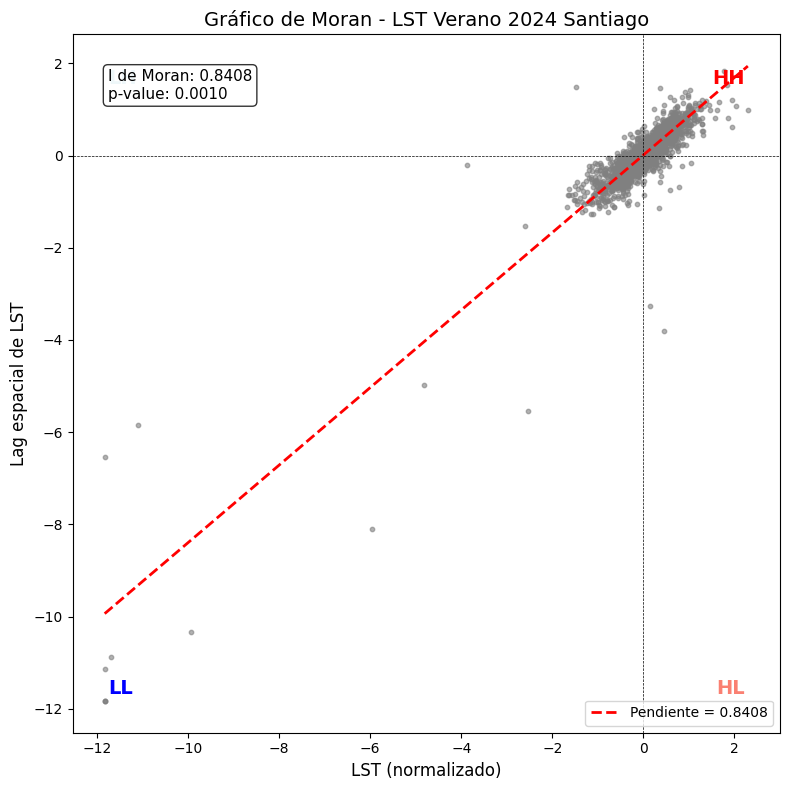

In [22]:
# GRAFICO MORAN
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot
ax.scatter(zonas['LST_norm'], zonas['LST_lag'], c='gray', s=10, alpha=0.6)

# Línea de regresión (pendiente = I de Moran)
m, b = np.polyfit(zonas['LST_norm'], zonas['LST_lag'], 1)
x_line = np.linspace(zonas['LST_norm'].min(), zonas['LST_norm'].max(), 100)
ax.plot(x_line, m * x_line + b, 'r--', linewidth=2, label=f'Pendiente = {m:.4f}')

# Líneas de referencia
ax.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='k', linestyle='--', linewidth=0.5)

# Etiquetas de cuadrantes
ax.text(0.95, 0.95, 'HH', transform=ax.transAxes, fontsize=14, fontweight='bold', 
        ha='right', va='top', color='red')
ax.text(0.05, 0.95, 'LH', transform=ax.transAxes, fontsize=14, fontweight='bold', 
        ha='left', va='top', color='lightblue')
ax.text(0.05, 0.05, 'LL', transform=ax.transAxes, fontsize=14, fontweight='bold', 
        ha='left', va='bottom', color='blue')
ax.text(0.95, 0.05, 'HL', transform=ax.transAxes, fontsize=14, fontweight='bold', 
        ha='right', va='bottom', color='salmon')

# Configuración del gráfico
ax.set_xlabel('LST (normalizado)', fontsize=12)
ax.set_ylabel('Lag espacial de LST', fontsize=12)
ax.set_title('Gráfico de Moran - LST Verano 2024 Santiago', fontsize=14)

# Cuadro de texto con estadísticas
textstr = f'I de Moran: {moran.I:.4f}\np-value: {moran.p_sim:.4f}'
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig('grafico_moran_LST.png', dpi=150, bbox_inches='tight')
plt.show()

Existe fuerte evidencia de autocorrelación espacial global en la distribución de temperatura superficial (LST) en Santiago. El índice I de Moran obtuvo un valor de 0.8408, muy superior al valor esperado bajo aleatoriedad espacial (E[I] = -0.0006). Este resultado es estadísticamente significativo con un p-value de 0.001 y un z-score de 59.1, lo que permite rechazar la hipótesis nula de distribución espacial aleatoria.


El valor positivo y cercano a 1 del índice de Moran indica un patrón de clustering espacial: las zonas con altas temperaturas tienden a estar rodeadas de otras zonas calientes, y las zonas frías tienden a agruparse con otras zonas frías. Esto confirma la existencia de un patrón espacial estructurado en la distribución de la temperatura superficial en la ciudad de Santiago durante el verano 2024.

#### 2.1.b [3 ptos] Analice los patrones de autocorrelación local ¿Existen zonas de cold/hot spots y outliers? Si es así, identifíquelos espacialmente mediante un análisis LISA, y evalúe su nivel de confiabilidad estadística.

In [23]:
# LISA

import matplotlib.patches as mpatches

# Moran Local
lisa = esda.moran.Moran_Local(zonas['LST_norm'], w)

# metemos a un dataframe
zonas['lisa_q'] = lisa.q            # Cuadrante (1=HH, 2=LH, 3=LL, 4=HL)
zonas['lisa_p'] = lisa.p_sim        # p-value de simulación
zonas['significant'] = lisa.p_sim < 0.05  # Significancia al 95%

# Máscaras
HHm = (zonas['significant']) & (zonas['lisa_q'] == 1)  # Hot spots
LLm = (zonas['significant']) & (zonas['lisa_q'] == 3)  # Cold spots
HLm = (zonas['significant']) & (zonas['lisa_q'] == 4)  # High-Low outliers
LHm = (zonas['significant']) & (zonas['lisa_q'] == 2)  # Low-High outliers

print("=== CLUSTERS SIGNIFICATIVOS (p < 0.05) ===")
print(f"Hot Spots (HH): {HHm.sum()} zonas")
print(f"Cold Spots (LL): {LLm.sum()} zonas")
print(f"Outliers High-Low (HL): {HLm.sum()} zonas")
print(f"Outliers Low-High (LH): {LHm.sum()} zonas")

=== CLUSTERS SIGNIFICATIVOS (p < 0.05) ===
Hot Spots (HH): 396 zonas
Cold Spots (LL): 140 zonas
Outliers High-Low (HL): 6 zonas
Outliers Low-High (LH): 7 zonas


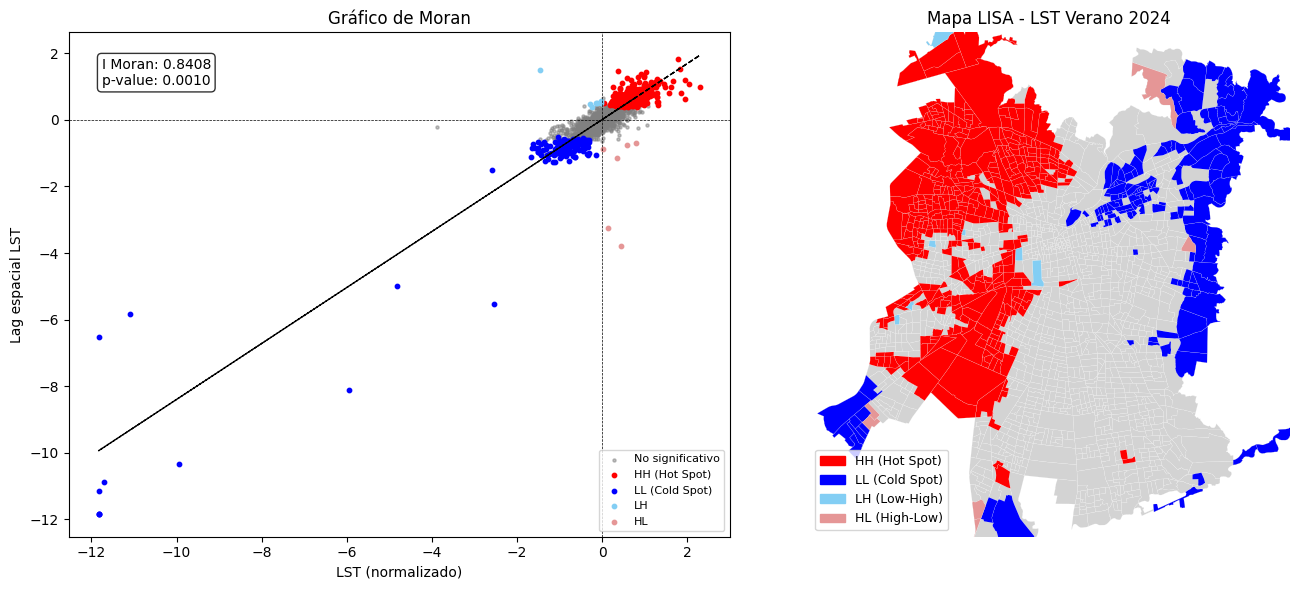

In [26]:
# Moran y Lisa

# Definir colores
palette = {'HH (Hot Spot)': 'red', 'LL (Cold Spot)': 'blue', 
           'LH (Low-High)': '#83cef4', 'HL (High-Low)': '#e59696'}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Grafico de moran
x = zonas['LST_norm']
y = zonas['LST_lag']

# Puntos no significativos en gris
ax1.scatter(x, y, c='gray', s=5, alpha=0.5, label='No significativo')

# Puntos significativos con color
ax1.scatter(x[HHm], y[HHm], c='red', s=10, label='HH (Hot Spot)')
ax1.scatter(x[LLm], y[LLm], c='blue', s=10, label='LL (Cold Spot)')
ax1.scatter(x[LHm], y[LHm], c='#83cef4', s=10, label='LH')
ax1.scatter(x[HLm], y[HLm], c='#e59696', s=10, label='HL')

# Línea de regresión
m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x + b, 'k--', linewidth=1)

ax1.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
ax1.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
ax1.set_xlabel('LST (normalizado)')
ax1.set_ylabel('Lag espacial LST')
ax1.set_title('Gráfico de Moran')
ax1.legend(loc='lower right', fontsize=8)
ax1.text(0.05, 0.95, f'I Moran: {moran.I:.4f}\np-value: {moran.p_sim:.4f}',
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# mapa lisa
zonas.to_crs(4326).plot(ax=ax2, color='lightgray', edgecolor='white', linewidth=0.1)

# clusters
datsig = {'HH (Hot Spot)': HHm, 'LL (Cold Spot)': LLm, 
          'LH (Low-High)': LHm, 'HL (High-Low)': HLm}

handles = []
for ctype, mask in datsig.items():
    if mask.sum() > 0:
        zonas[mask].to_crs(4326).plot(ax=ax2, color=palette[ctype], 
                                       edgecolor='white', linewidth=0.1)
        handles.append(mpatches.Patch(color=palette[ctype], label=ctype))

ax2.legend(handles=handles, loc='lower left', fontsize=9)
ax2.set_title('Mapa LISA - LST Verano 2024')
ax2.set_xlim(-70.85, -70.45)
ax2.set_ylim(-33.65, -33.30)
ax2.set_axis_off()

plt.tight_layout()
plt.savefig('LISA_LST_santiago.png', dpi=150, bbox_inches='tight')
plt.show()

In [27]:
# niveles de confianza
confidence_levels = [0.05, 0.01, 0.001]

print("\n=== ANÁLISIS POR NIVEL DE CONFIANZA ===")
for alpha in confidence_levels:
    sig = zonas['lisa_p'] < alpha
    hh = sig & (zonas['lisa_q'] == 1)
    ll = sig & (zonas['lisa_q'] == 3)
    hl = sig & (zonas['lisa_q'] == 4)
    lh = sig & (zonas['lisa_q'] == 2)
    
    conf = (1 - alpha) * 100
    print(f"\nConfianza {conf:.1f}% (p < {alpha}):")
    print(f"  Hot Spots (HH): {hh.sum()} zonas")
    print(f"  Cold Spots (LL): {ll.sum()} zonas")
    print(f"  Outliers HL: {hl.sum()} zonas")
    print(f"  Outliers LH: {lh.sum()} zonas")


=== ANÁLISIS POR NIVEL DE CONFIANZA ===

Confianza 95.0% (p < 0.05):
  Hot Spots (HH): 396 zonas
  Cold Spots (LL): 140 zonas
  Outliers HL: 6 zonas
  Outliers LH: 7 zonas

Confianza 99.0% (p < 0.01):
  Hot Spots (HH): 208 zonas
  Cold Spots (LL): 11 zonas
  Outliers HL: 2 zonas
  Outliers LH: 1 zonas

Confianza 99.9% (p < 0.001):
  Hot Spots (HH): 0 zonas
  Cold Spots (LL): 0 zonas
  Outliers HL: 0 zonas
  Outliers LH: 0 zonas


El análisis LISA confirma la existencia de zonas de hot spots, cold spots y outliers estadísticamente significativos en la distribución de LST en Santiago. Al 95% de confianza, se identificaron 396 Hot Spots (islas de calor) concentrados en el sector poniente y norponiente de la ciudad, y 140 Cold Spots (islas de frescor) ubicados principalmente en el sector oriente y precordillerano. Los outliers espaciales fueron escasos (6 HL y 7 LH), indicando un patrón térmico espacialmente coherente.

La evaluación de robustez estadística mostró que los Hot Spots son más confiables: al 99% de confianza se mantienen 208 hot spots versus solo 11 cold spots. Esto sugiere que las islas de calor urbano están mejor definidas espacialmente que las zonas de frescor. El claro gradiente térmico poniente-oriente observado en el mapa LISA es consistente con las diferencias en densidad urbana, cobertura vegetal y topografía entre ambos sectores de Santiago.

#### 2.2.a [3 ptos] Identifique cold-spots y hot-spots de densidad de adultos mayores por zona, en base a la cartografía por zonas del Censo 2024 (edad_60_mas).

In [32]:
# Analisis para adultos mayores
gdb_path = 'Cartografía_censo2024_R13.gdb'
zonas_censo = gpd.read_file(gdb_path, layer='Zonal_CPV24')

# Filtrar solo zonas del Gran Santiago
zonas_censo = zonas_censo[zonas_censo['LOCALIDAD'] == 'GRAN SANTIAGO']

# Seleccionar columnas de interés
zonas_censo = zonas_censo[['ID_ZONA', 'n_per', 'n_edad_60_mas', 'geometry']]
zonas_censo['ID_ZONA'] = zonas_censo['ID_ZONA'].astype('int')

# Reproyectar a UTM 19S
zonas_censo = zonas_censo.to_crs(32719)

print(f"Zonas censales cargadas: {len(zonas_censo)} zonas")

Zonas censales cargadas: 1660 zonas


Zonas con datos válidos: 1658


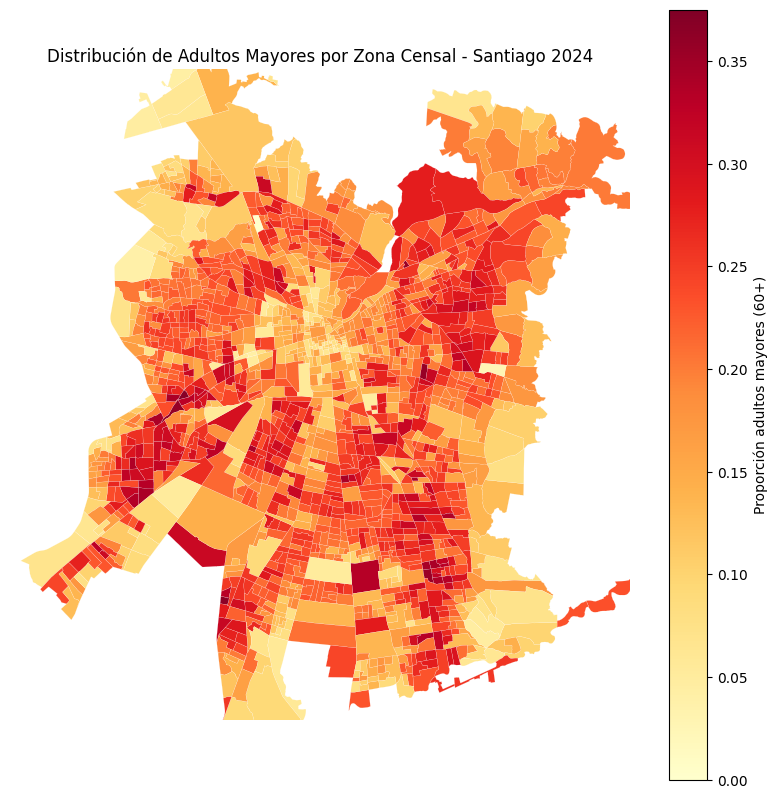

In [33]:
# ratio
# normalizamos
zonas_censo['ratio_60_mas'] = zonas_censo['n_edad_60_mas'] / zonas_censo['n_per']

zonas_censo = zonas_censo[~zonas_censo['ratio_60_mas'].isna()]
print(f"Zonas con datos válidos: {len(zonas_censo)}")

# Visualización preliminar
fig, ax = plt.subplots(figsize=(10, 10))
zonas_censo.to_crs(4326).plot(ax=ax, column='ratio_60_mas', cmap='YlOrRd', 
                               legend=True, edgecolor='white', linewidth=0.1,
                               legend_kwds={'label': 'Proporción adultos mayores (60+)'})
ax.set_title('Distribución de Adultos Mayores por Zona Censal - Santiago 2024')
ax.set_xlim(-70.85, -70.45)
ax.set_ylim(-33.65, -33.30)
ax.set_axis_off()
plt.show()

In [34]:
# LISA

w_am = weights.contiguity.Queen.from_dataframe(zonas_censo, idVariable='ID_ZONA')
w_am.transform = 'R'

# Normalizar
mean_am = zonas_censo['ratio_60_mas'].mean()
std_am = zonas_censo['ratio_60_mas'].std()
zonas_censo['am_norm'] = (zonas_censo['ratio_60_mas'] - mean_am) / std_am

# lag espacial
zonas_censo['am_lag'] = weights.lag_spatial(w_am, zonas_censo['am_norm'])

# Moran
moran_am = esda.moran.Moran(zonas_censo['am_norm'], w_am)

print("=== AUTOCORRELACIÓN GLOBAL - ADULTOS MAYORES ===")
print(f"I de Moran: {moran_am.I:.4f}")
print(f"p-value: {moran_am.p_sim:.4f}")

# Calcular LISA
lisa_am = esda.moran.Moran_Local(zonas_censo['am_norm'], w_am)

# Agregar resultados
zonas_censo['lisa_q'] = lisa_am.q
zonas_censo['lisa_p'] = lisa_am.p_sim
zonas_censo['significant'] = lisa_am.p_sim < 0.05

# Máscaras para clusters significativos
HHm_am = (zonas_censo['significant']) & (zonas_censo['lisa_q'] == 1)
LLm_am = (zonas_censo['significant']) & (zonas_censo['lisa_q'] == 3)
HLm_am = (zonas_censo['significant']) & (zonas_censo['lisa_q'] == 4)
LHm_am = (zonas_censo['significant']) & (zonas_censo['lisa_q'] == 2)

print("\n=== CLUSTERS SIGNIFICATIVOS (p < 0.05) ===")
print(f"Hot Spots (HH) - Alta concentración de adultos mayores: {HHm_am.sum()} zonas")
print(f"Cold Spots (LL) - Baja concentración de adultos mayores: {LLm_am.sum()} zonas")
print(f"Outliers High-Low (HL): {HLm_am.sum()} zonas")
print(f"Outliers Low-High (LH): {LHm_am.sum()} zonas")

=== AUTOCORRELACIÓN GLOBAL - ADULTOS MAYORES ===
I de Moran: 0.4977
p-value: 0.0010

=== CLUSTERS SIGNIFICATIVOS (p < 0.05) ===
Hot Spots (HH) - Alta concentración de adultos mayores: 247 zonas
Cold Spots (LL) - Baja concentración de adultos mayores: 271 zonas
Outliers High-Low (HL): 36 zonas
Outliers Low-High (LH): 24 zonas


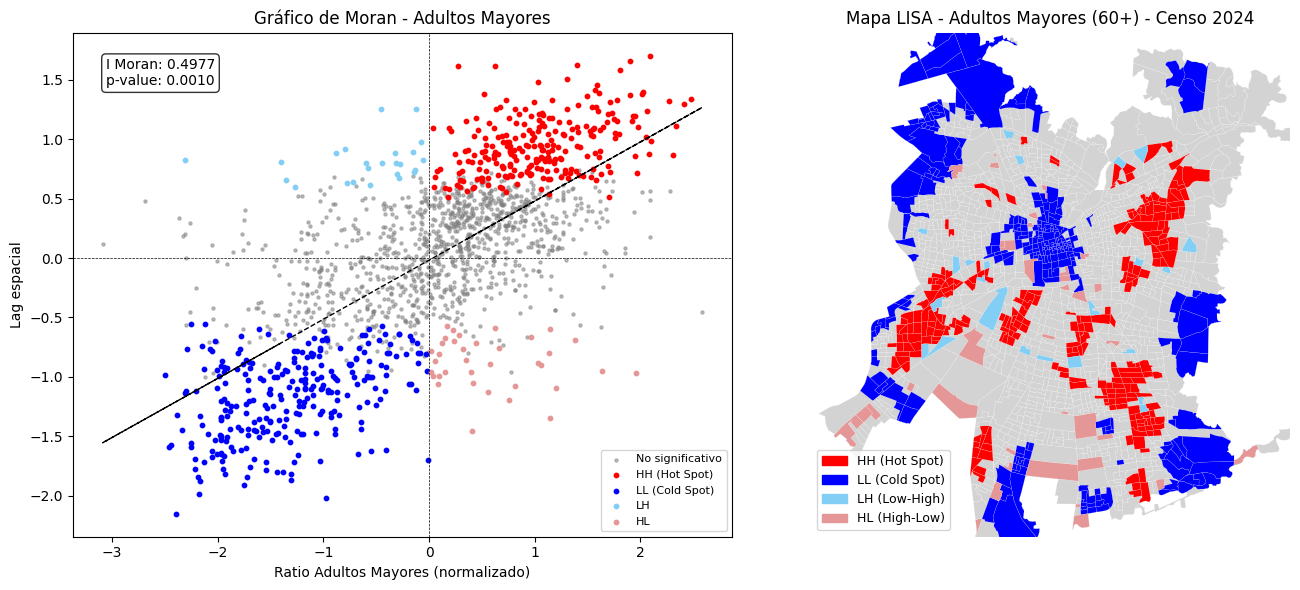

In [35]:
# graficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

x = zonas_censo['am_norm']
y = zonas_censo['am_lag']

# --- Gráfico de Moran ---
ax1.scatter(x, y, c='gray', s=5, alpha=0.5, label='No significativo')
ax1.scatter(x[HHm_am], y[HHm_am], c='red', s=10, label='HH (Hot Spot)')
ax1.scatter(x[LLm_am], y[LLm_am], c='blue', s=10, label='LL (Cold Spot)')
ax1.scatter(x[LHm_am], y[LHm_am], c='#83cef4', s=10, label='LH')
ax1.scatter(x[HLm_am], y[HLm_am], c='#e59696', s=10, label='HL')

m, b = np.polyfit(x, y, 1)
ax1.plot(x, m*x + b, 'k--', linewidth=1)

ax1.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
ax1.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
ax1.set_xlabel('Ratio Adultos Mayores (normalizado)')
ax1.set_ylabel('Lag espacial')
ax1.set_title('Gráfico de Moran - Adultos Mayores')
ax1.legend(loc='lower right', fontsize=8)
ax1.text(0.05, 0.95, f'I Moran: {moran_am.I:.4f}\np-value: {moran_am.p_sim:.4f}',
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# --- Mapa LISA ---
zonas_censo.to_crs(4326).plot(ax=ax2, color='lightgray', edgecolor='white', linewidth=0.1)

palette = {'HH (Hot Spot)': 'red', 'LL (Cold Spot)': 'blue', 
           'LH (Low-High)': '#83cef4', 'HL (High-Low)': '#e59696'}

datsig = {'HH (Hot Spot)': HHm_am, 'LL (Cold Spot)': LLm_am, 
          'LH (Low-High)': LHm_am, 'HL (High-Low)': HLm_am}

handles = []
for ctype, mask in datsig.items():
    if mask.sum() > 0:
        zonas_censo[mask].to_crs(4326).plot(ax=ax2, color=palette[ctype], 
                                             edgecolor='white', linewidth=0.1)
        handles.append(mpatches.Patch(color=palette[ctype], label=ctype))

ax2.legend(handles=handles, loc='lower left', fontsize=9)
ax2.set_title('Mapa LISA - Adultos Mayores (60+) - Censo 2024')
ax2.set_xlim(-70.85, -70.45)
ax2.set_ylim(-33.65, -33.30)
ax2.set_axis_off()

plt.tight_layout()
plt.savefig('LISA_adultos_mayores.png', dpi=150, bbox_inches='tight')
plt.show()

El análisis LISA identificó cold spots y hot spots significativos en la distribución de adultos mayores en Santiago. El índice de Moran global (I = 0.4977, p = 0.001) indica una autocorrelación espacial positiva moderada, confirmando que la población de 60 años o más no se distribuye aleatoriamente en la ciudad.

Al 95% de confianza, se identificaron 247 Hot Spots (zonas con alta concentración de adultos mayores rodeadas de otras zonas similares) y 271 Cold Spots (zonas con baja concentración de adultos mayores). A diferencia del análisis de LST, se observa una cantidad considerable de outliers espaciales (36 HL y 24 LH), lo que indica mayor heterogeneidad en la distribución de este grupo demográfico.
    
El mapa LISA muestra que los Hot Spots de adultos mayores se concentran principalmente en el sector oriente y algunas zonas del centro de Santiago, correspondientes a comunas consolidadas y de mayor nivel socioeconómico. Por otro lado, los Cold Spots se ubican en sectores periféricos como el poniente, sur y norponiente, que corresponden a comunas con población más joven y de desarrollo urbano más reciente.

#### 2.2.b [3 ptos] Compare los patrones de autocorrelación y la ubicación de hot-spots de adultos mayores con hot-spots de temperatura superficial en el Gran Santiago. ¿Puede plantear alguna conclusión o hipótesis al respecto?

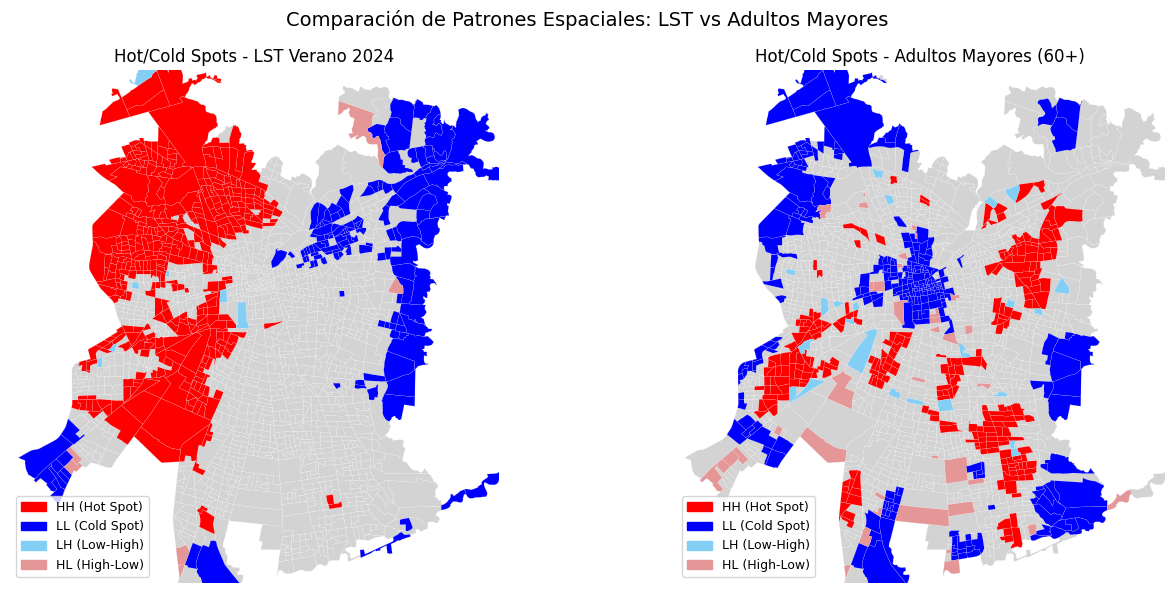

In [36]:
# ===========================================
# 2.2.b COMPARACIÓN LST vs ADULTOS MAYORES
# ===========================================

# -----------------------------------------
# 1. Mapa comparativo lado a lado
# -----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

palette = {'HH (Hot Spot)': 'red', 'LL (Cold Spot)': 'blue', 
           'LH (Low-High)': '#83cef4', 'HL (High-Low)': '#e59696'}

# --- Mapa LISA LST (izquierda) ---
zonas.to_crs(4326).plot(ax=ax1, color='lightgray', edgecolor='white', linewidth=0.1)

datsig_lst = {'HH (Hot Spot)': HHm, 'LL (Cold Spot)': LLm, 
              'LH (Low-High)': LHm, 'HL (High-Low)': HLm}

handles1 = []
for ctype, mask in datsig_lst.items():
    if mask.sum() > 0:
        zonas[mask].to_crs(4326).plot(ax=ax1, color=palette[ctype], 
                                       edgecolor='white', linewidth=0.1)
        handles1.append(mpatches.Patch(color=palette[ctype], label=ctype))

ax1.legend(handles=handles1, loc='lower left', fontsize=9)
ax1.set_title('Hot/Cold Spots - LST Verano 2024', fontsize=12)
ax1.set_xlim(-70.85, -70.45)
ax1.set_ylim(-33.65, -33.30)
ax1.set_axis_off()

# --- Mapa LISA Adultos Mayores (derecha) ---
zonas_censo.to_crs(4326).plot(ax=ax2, color='lightgray', edgecolor='white', linewidth=0.1)

datsig_am = {'HH (Hot Spot)': HHm_am, 'LL (Cold Spot)': LLm_am, 
             'LH (Low-High)': LHm_am, 'HL (High-Low)': HLm_am}

handles2 = []
for ctype, mask in datsig_am.items():
    if mask.sum() > 0:
        zonas_censo[mask].to_crs(4326).plot(ax=ax2, color=palette[ctype], 
                                             edgecolor='white', linewidth=0.1)
        handles2.append(mpatches.Patch(color=palette[ctype], label=ctype))

ax2.legend(handles=handles2, loc='lower left', fontsize=9)
ax2.set_title('Hot/Cold Spots - Adultos Mayores (60+)', fontsize=12)
ax2.set_xlim(-70.85, -70.45)
ax2.set_ylim(-33.65, -33.30)
ax2.set_axis_off()

plt.suptitle('Comparación de Patrones Espaciales: LST vs Adultos Mayores', fontsize=14)
plt.tight_layout()
plt.savefig('comparacion_LST_adultos_mayores.png', dpi=150, bbox_inches='tight')
plt.show()

In [37]:
# -----------------------------------------
# 2. Tabla comparativa de estadísticas
# -----------------------------------------
print("=" * 60)
print("COMPARACIÓN DE PATRONES DE AUTOCORRELACIÓN ESPACIAL")
print("=" * 60)

print("\n{:<30} {:>12} {:>12}".format("Estadístico", "LST", "Adultos 60+"))
print("-" * 60)
print("{:<30} {:>12.4f} {:>12.4f}".format("I de Moran", moran.I, moran_am.I))
print("{:<30} {:>12.4f} {:>12.4f}".format("p-value", moran.p_sim, moran_am.p_sim))

print("\n{:<30} {:>12} {:>12}".format("Clusters (p < 0.05)", "LST", "Adultos 60+"))
print("-" * 60)
print("{:<30} {:>12} {:>12}".format("Hot Spots (HH)", HHm.sum(), HHm_am.sum()))
print("{:<30} {:>12} {:>12}".format("Cold Spots (LL)", LLm.sum(), LLm_am.sum()))
print("{:<30} {:>12} {:>12}".format("Outliers HL", HLm.sum(), HLm_am.sum()))
print("{:<30} {:>12} {:>12}".format("Outliers LH", LHm.sum(), LHm_am.sum()))

COMPARACIÓN DE PATRONES DE AUTOCORRELACIÓN ESPACIAL

Estadístico                             LST  Adultos 60+
------------------------------------------------------------
I de Moran                           0.8408       0.4977
p-value                              0.0010       0.0010

Clusters (p < 0.05)                     LST  Adultos 60+
------------------------------------------------------------
Hot Spots (HH)                          396          247
Cold Spots (LL)                         140          271
Outliers HL                               6           36
Outliers LH                               7           24


In [39]:
# -----------------------------------------
# 3. Análisis de coincidencia espacial
# -----------------------------------------

# Crear dataframes con los resultados LISA de cada variable
lisa_lst = zonas[['ID_ZONA']].copy()
lisa_lst['HH_LST'] = HHm.values
lisa_lst['LL_LST'] = LLm.values

lisa_am = zonas_censo[['ID_ZONA']].copy()
lisa_am['HH_AM'] = HHm_am.values
lisa_am['LL_AM'] = LLm_am.values

# Unir por ID_ZONA
zonas_comp = pd.merge(lisa_lst, lisa_am, on='ID_ZONA', how='inner')

print(f"Zonas en común para comparación: {len(zonas_comp)}")

# Calcular coincidencias
hh_lst_hh_am = (zonas_comp['HH_LST'] & zonas_comp['HH_AM']).sum()
hh_lst_ll_am = (zonas_comp['HH_LST'] & zonas_comp['LL_AM']).sum()
ll_lst_hh_am = (zonas_comp['LL_LST'] & zonas_comp['HH_AM']).sum()
ll_lst_ll_am = (zonas_comp['LL_LST'] & zonas_comp['LL_AM']).sum()

print("\n" + "=" * 60)
print("ANÁLISIS DE COINCIDENCIA ESPACIAL")
print("=" * 60)
print("\n{:<45} {:>10}".format("Coincidencia", "N° Zonas"))
print("-" * 60)
print("{:<45} {:>10}".format("Hot Spot LST + Hot Spot Adultos Mayores", hh_lst_hh_am))
print("{:<45} {:>10}".format("Hot Spot LST + Cold Spot Adultos Mayores", hh_lst_ll_am))
print("{:<45} {:>10}".format("Cold Spot LST + Hot Spot Adultos Mayores", ll_lst_hh_am))
print("{:<45} {:>10}".format("Cold Spot LST + Cold Spot Adultos Mayores", ll_lst_ll_am))

Zonas en común para comparación: 1658

ANÁLISIS DE COINCIDENCIA ESPACIAL

Coincidencia                                    N° Zonas
------------------------------------------------------------
Hot Spot LST + Hot Spot Adultos Mayores               39
Hot Spot LST + Cold Spot Adultos Mayores              62
Cold Spot LST + Hot Spot Adultos Mayores              18
Cold Spot LST + Cold Spot Adultos Mayores             11


Al comparar ambos mapas, lo primero que salta a la vista es que los patrones son bastante distintos. La temperatura superficial muestra un patrón muy marcado y compacto, con un I de Moran de 0.84, donde las zonas calientes están claramente agrupadas en el poniente y las frías en el oriente. En cambio, la distribución de adultos mayores es más dispersa y fragmentada (I de Moran = 0.50), con hot spots y cold spots repartidos de manera menos ordenada por toda la ciudad.

Lo interesante viene cuando analizamos dónde coinciden estos patrones. De las 1658 zonas comparadas, encontramos que 62 zonas son al mismo tiempo muy calientes y con pocos adultos mayores, mientras que solo 39 zonas combinan altas temperaturas con alta concentración de personas mayores de 60 años. Esto sugiere que, en general, los adultos mayores en Santiago no viven mayoritariamente en las zonas más calientes de la ciudad.
Sin embargo, esas 39 zonas donde sí coinciden ambos hot spots son preocupantes. Se trata de sectores donde población vulnerable al calor está expuesta a las temperaturas más altas, probablemente en comunas del sector poniente o centro con viviendas antiguas y poca vegetación.
    
Hipótesis:
El patrón observado refleja la segregación socioeconómica de Santiago. El sector oriente, más fresco por su cercanía a la cordillera y mayor cantidad de áreas verdes, concentra comunas de mayores ingresos donde parte de la población adulta mayor ha podido envejecer en sus barrios. Las zonas más calientes del poniente, con mayor densidad urbana y menos vegetación, tienen población más joven debido a la expansión urbana reciente. Las 39 zonas donde coinciden hot spots de temperatura y adultos mayores representan áreas de alta vulnerabilidad que deberían priorizarse en políticas de adaptación climática.
